In [33]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
crash_data = pd.read_csv('C:/Users/willi/Desktop/MLA_Crash_Paper/All_Model.csv')
crash_data.describe()

,Unnamed: 0,CRASH_SEVERITY,SPEED_DIFF_MAX,ALCOHOL_NOTALCOHOL_No,ALCOHOL_NOTALCOHOL_Yes,DISTRACTED_NOTDISTRACTED_No,DISTRACTED_NOTDISTRACTED_Yes,DRUG_NODRUG_No,DRUG_NODRUG_Yes,SPEED_NOTSPEED_No,SPEED_NOTSPEED_Yes,WEATHER_1. No Adverse Condition (Clear/Cloudy),WEATHER_5. Rain,WEATHER_Bad_Weather,LIGHT_2. Daylight,LIGHT_5. Darkness - Road Not Lighted,LIGHT_Semi_Dark
count,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.000000,977346.00000
mean,488672.500000,0.056057,2.712561,0.942571,0.057429,0.810102,0.189898,0.990704,0.009296,0.801542,0.198458,0.827327,0.131199,0.041474,0.659021,0.148688,0.19229
std,282135.632433,0.230032,7.263185,0.232661,0.232661,0.392220,0.392220,0.095964,0.095964,0.398839,0.398839,0.377964,0.337618,0.199383,0.474038,0.355781,0.39410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,244336.250000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,488672.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
75%,733008.750000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,977345.000000,1.000000,175.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [37]:
crash_data = crash_data.drop(columns=['Unnamed: 0', 'SPEED_NOTSPEED_No', 'SPEED_NOTSPEED_Yes'])
crash_data.sample(5)

,CRASH_SEVERITY,SPEED_DIFF_MAX,ALCOHOL_NOTALCOHOL_No,ALCOHOL_NOTALCOHOL_Yes,DISTRACTED_NOTDISTRACTED_No,DISTRACTED_NOTDISTRACTED_Yes,DRUG_NODRUG_No,DRUG_NODRUG_Yes,WEATHER_1. No Adverse Condition (Clear/Cloudy),WEATHER_5. Rain,WEATHER_Bad_Weather,LIGHT_2. Daylight,LIGHT_5. Darkness - Road Not Lighted,LIGHT_Semi_Dark
125301,0,0.0,1,0,1,0,1,0,1,0,0,1,0,0
42904,0,0.0,1,0,1,0,1,0,1,0,0,1,0,0
298118,0,0.0,1,0,1,0,1,0,1,0,0,0,0,1
344097,0,40.0,1,0,1,0,1,0,1,0,0,0,1,0
944790,0,0.0,1,0,0,1,1,0,1,0,0,1,0,0


In [38]:
from sklearn.model_selection import train_test_split

X= crash_data.drop('CRASH_SEVERITY', axis=1)
Y= crash_data['CRASH_SEVERITY']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y)

In [39]:
from xgboost import XGBClassifier

In [40]:
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'auc',  # Evaluation metric
    'eta': 0.01,  # Learning rate
    'max_depth': 6,  # Maximum depth of a tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'min_child_weight': 100,  # Minimum sum of instance weight needed in a child
    'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node
    'alpha': 1,  # L1 regularization term on weights
    'lambda': 0,  # L2 regularization term on weights
    'seed': 42,  # Random seed
}

In [41]:
# Create the XGBoost classifier model with the specified hyperparameters
xgb_clf = XGBClassifier(**params)

# Train the model
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, ...)

In [42]:
# Make predictions on the test set
y_pred_XGB = xgb_clf.predict(x_test)
y_pred_proba_XGB = xgb_clf.predict_proba(x_test)[:, 1]
y_pred_P_XGB = pd.DataFrame(y_pred_proba_XGB, columns=['XGB_Prob'])


In [21]:
y_pred_P_XGB.to_csv('C:/Users/willi/Desktop/MLA_Crash_Paper/XGB_Prob.csv')

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:, 1])
print("Accuracy:", accuracy)
print("AUC:", auc)

Accuracy: 0.9439453624597125
AUC: 0.61969016068174


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    184513
           1       0.00      0.00      0.00     10957

    accuracy                           0.94    195470
   macro avg       0.47      0.50      0.49    195470
weighted avg       0.89      0.94      0.92    195470



C:\Users\willi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [45]:
# Step 2: Make predictions using the XGBoost model
y_pred_proba = xgb_clf.predict_proba(x_test)[:, 1]  # Use probabilities for Somers' D calculation
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

0.61969016068174


In [46]:
#Calculating Somers' D
sd = 2*auc-1
print(sd)

0.23938032136347998


In [47]:
importance_scores = xgb_clf.feature_importances_
feature_names = x_train.columns.tolist()

In [48]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})
feature_importance_df.head()

,Feature,Importance
0,SPEED_DIFF_MAX,0.041174
1,ALCOHOL_NOTALCOHOL_No,0.881327
2,ALCOHOL_NOTALCOHOL_Yes,0.000000
3,DISTRACTED_NOTDISTRACTED_No,0.007840
4,DISTRACTED_NOTDISTRACTED_Yes,0.000000


In [51]:
# Get the booster from the trained model
booster = xgb_clf.get_booster()

# Get the total gains of each feature
total_gains = booster.get_score(importance_type="total_gain")

# Convert the dictionary of total gains to a DataFrame
total_gains_df = pd.DataFrame(total_gains.items(), columns=['Feature', 'Total Gain'])

# Sort the DataFrame by total gain in descending order
total_gains_df = total_gains_df.sort_values(by='Total Gain', ascending=False)

# Print the results
total_gains_df

,Feature,Total Gain
1,ALCOHOL_NOTALCOHOL_No,114021.210938
0,SPEED_DIFF_MAX,62324.746094
4,WEATHER_1. No Adverse Condition (Clear/Cloudy),7069.840820
8,LIGHT_Semi_Dark,6408.374512
3,DRUG_NODRUG_No,5810.299805
7,LIGHT_5. Darkness - Road Not Lighted,4720.384277
2,DISTRACTED_NOTDISTRACTED_No,3580.482666
5,WEATHER_5. Rain,385.724792
6,LIGHT_2. Daylight,164.237152


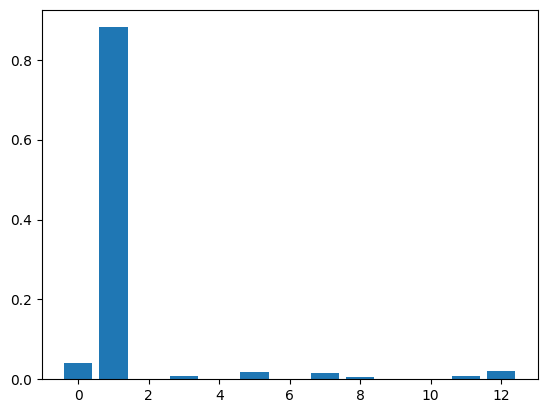

In [52]:
import matplotlib.pyplot as plt
plt.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_)
plt.show()